In [6]:
import sys
print(sys.executable)

e:\virtual_environment\venv\Scripts\python.exe


# **🏁 Giai đoạn 1: PyTorch Cơ Bản**

**1️⃣ Tạo Tensor và Các Thao Tác Cơ Bản**

In [15]:
import torch
import numpy as np

# Tạo tensor từ danh sách Python
tensor_a = torch.tensor([[1, 2], [3, 4]])

# Tạo tensor từ NumPy array
np_array = np.array([[5, 6], [7, 8]])
tensor_b = torch.from_numpy(np_array)

# Chuyển đổi tensor sang NumPy
np_from_tensor = tensor_a.numpy()

print("Tensor A:\n", tensor_a)
print("Tensor B (từ NumPy):\n", tensor_b)
print("NumPy từ Tensor A:\n", np_from_tensor)


Tensor A:
 tensor([[1, 2],
        [3, 4]])
Tensor B (từ NumPy):
 tensor([[5, 6],
        [7, 8]])
NumPy từ Tensor A:
 [[1 2]
 [3 4]]


**2️⃣ Indexing, Slicing, Reshaping**

In [8]:
tensor = torch.arange(1, 10).reshape(3, 3)  # Tạo tensor 3x3 từ 1 đến 9
print("Tensor:\n", tensor)

# Indexing
print("Phần tử (1,1):", tensor[1, 1])

# Slicing
print("Dòng đầu tiên:\n", tensor[0, :])
print("Cột đầu tiên:\n", tensor[:, 0])

# Reshaping
reshaped_tensor = tensor.view(1, 9)  # Chuyển tensor thành dạng 1x9
print("Reshaped Tensor:\n", reshaped_tensor)

Tensor:
 tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Phần tử (1,1): tensor(5)
Dòng đầu tiên:
 tensor([1, 2, 3])
Cột đầu tiên:
 tensor([1, 4, 7])
Reshaped Tensor:
 tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])


**3️⃣ Các Phép Toán Cơ Bản Trên Tensor**

In [18]:
x = torch.tensor([[1., 2.], [3., 4.]])
y = torch.tensor([[5., 6.], [7., 8.]])

# Cộng, trừ, nhân, chia
print("Cộng:\n", x + y)
print("Trừ:\n", x - y)
print("Nhân:\n", x * y)  # Nhân từng phần tử
print("Chia:\n", x / y)

# Tích ma trận
matrix_mul = torch.matmul(x, y)
print("Tích ma trận:\n", matrix_mul)

Cộng:
 tensor([[ 6.,  8.],
        [10., 12.]])
Trừ:
 tensor([[-4., -4.],
        [-4., -4.]])
Nhân:
 tensor([[ 5., 12.],
        [21., 32.]])
Chia:
 tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])
Tích ma trận:
 tensor([[19., 22.],
        [43., 50.]])


**4️⃣ Tính Gradient và Đạo Hàm**

In [ ]:
# Khai báo tensor cần tính gradient
x = torch.tensor(3.0, requires_grad=True)

# Hàm số y = x^2 + 2x + 1
y = x**2 + 2*x + 1
z = y**2

# Tính gradient
z.backward()

# No Gradient của y tại x=3 (y = x^2 + 2x + 1)
with torch.no_grad():
    print("No Gradient tại x=3:", z.item())

# Gradient của y tại x=3 (dy/dx = 2x + 2)
print("Gradient tại x=3:", x.grad.item())

No Gradient tại x=3: 16.0
Gradient tại x=3: 32.0


**5️⃣ Nhân Hai Ma Trận Bằng PyTorch**

In [28]:
A = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32)
B = torch.tensor([[7, 8], [9, 10], [11, 12]], dtype=torch.float32)

# Nhân ma trận A và B
C = torch.mm(A, B)

print("Kết quả nhân ma trận:\n", C)

Kết quả nhân ma trận:
 tensor([[ 58.,  64.],
        [139., 154.]])


**6️⃣ Dùng GPU Tăng Tốc với CUDA**

In [ ]:
# Kiểm tra nếu có GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Sử dụng thiết bị:", device)

# Tạo tensor trên GPU (nếu có)
tensor_gpu = torch.tensor([1.0, 2.0, 3.0], device=device)
print("Tensor trên GPU:", tensor_gpu.item())

Sử dụng thiết bị: cpu


RuntimeError: a Tensor with 3 elements cannot be converted to Scalar

# **🚀 Giai đoạn 2: PyTorch Workflow & Mô Hình Cơ Bản**

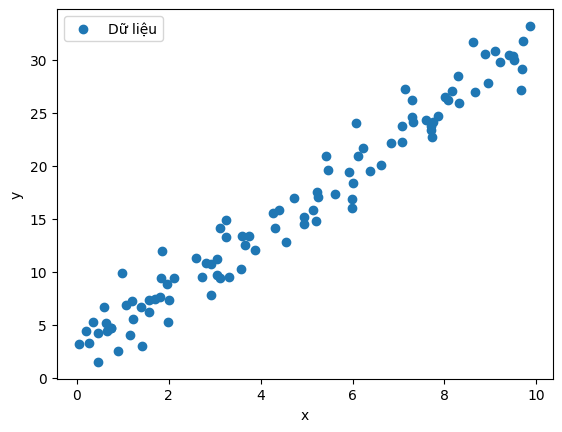

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import numpy as np

# Tạo dữ liệu x ngẫu nhiên từ 0 đến 10
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 * X + 2 + np.random.randn(100, 1) * 2  # Thêm nhiễu

# Chuyển sang tensor PyTorch
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Hiển thị dữ liệu
plt.scatter(X, y, label="Dữ liệu")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()